# Veri seti üzerindeki kümeleme işlemleri


## Kütüphanelerin yüklenmesi

In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Veri setinin çekilmesi

In [44]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 7096-3171

 Directory of C:\Users\bugra\Desktop\fut_scout_data\fut_scout_data_operations\understat_classification

14.05.2022  19:28    <DIR>          .
14.05.2022  19:28    <DIR>          ..
14.05.2022  18:48               673 clustering.py
14.05.2022  19:26            28.385 clustering_plot.ipynb
14.05.2022  18:33    <DIR>          data
14.05.2022  18:33             1.615 data_append.py
14.05.2022  18:33    <DIR>          figures
14.05.2022  18:33             2.477 full_data.py
14.05.2022  18:33    <DIR>          model
14.05.2022  19:22             4.295 train.py
14.05.2022  19:29           109.187 training_with_custom_parameters.ipynb
14.05.2022  18:33    <DIR>          understat_classification
               6 File(s)        146.632 bytes
               6 Dir(s)  289.574.313.984 bytes free


In [59]:

df = pd.read_csv('data/total_statistics_by_player.csv').drop(['Unnamed: 0'], axis = 1)

df_nongk = df['position'] != 'GK'
df_nongk2 = df['position'] != 'GK S'

df_last = df[df_nongk]
df_last2 = df_last[df_nongk2]

C:\Users\bugra\AppData\Local\Temp\ipykernel_13936\4020185954.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_last2 = df_last[df_nongk2]


## Veri setinin ana halinin ve kategorik kısımlarının atılması sonucu saklanması
KMeans ve PCA objesi tanımlanıyor, temel bileşen analizi için(**PCA**) belirlenen değer 2 ve verilerin bölüneceği küme sayısı(**Clustering**) 10 olarak belirleniyor.

In [60]:
df_last_val = df_last2.drop(['id', 'player_name', 'position'], axis=1)

pca = PCA(2)
sc = StandardScaler()
kmeans = KMeans(n_clusters= 10)

## Temel bileşen analizi ve Clustering'in uygulanması

İsim, id ve pozisyon gibi kümelemede bizi yanıltacak sütunların atıldığı ve standardizasyonun uygulandığı veri seti üzerinde temel bileşenler analizi yapılıyor. 
</br>
Analiz edilen verilere Clustering uygulanıyor.
</br>
Kümeler belirlendikten sonra ana veri setimize ekleniyor.
</br>
Küme sayımız ve kümelerin merkezleri grafik üzerinde kullanılmak üzere değişkenlere atanıyor.

In [61]:
df_last_val = sc.fit_transform(df_last_val)
df_last_val = pca.fit_transform(df_last_val)
classes = kmeans.fit_predict(df_last_val)
df_last2['classes'] = classes.reshape(-1,1)
u_labels = np.unique(classes)
centroids = kmeans.cluster_centers_

C:\Users\bugra\AppData\Local\Temp\ipykernel_13936\4237008473.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last2['classes'] = classes.reshape(-1,1)


## Kümelerin grafik üzerinde görüntülenmesi
Kümeler merkez noktalarıyla beraber **Matplotlib** kütüphanesi yardımıyla grafik üzerinde gösteriliyor.

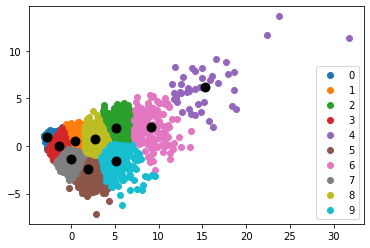

In [62]:
for i in u_labels:
    plt.scatter(df_last_val[classes == i , 0] , df_last_val[classes == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')

plt.legend()
plt.show()

df_last2.to_csv('data/clustered_data.csv')